In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
from __future__ import print_function
from scipy import signal
np.set_printoptions(threshold=np.nan) #print the whole arrray

In [2]:
t_inter = 200
n_samp_cos = 10
freq_samp = 1.0/((t_inter*1e-6))
freq_cos = 1.0/((t_inter*1e-6)*n_samp_cos)
print('cosine freq =', freq_cos, 'Hz')
print('sampling freq =', freq_samp, 'Hz')

cosine freq = 500.0 Hz
sampling freq = 5000.0 Hz


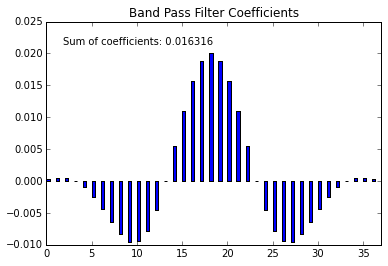

In [3]:
bp_coef = [ 0.000313, 0.000472, 0.000426, -0.000000, -0.000941, 
-0.002438, -0.004382, -0.006499, -0.008370, -0.009499, -0.009417, -0.007804, -0.004587, 0.000000, 0.005424, 0.010927, 0.015665, 0.018868, 0.020000, 0.018868, 
0.015665, 0.010927, 0.005424, 0.000000, -0.004587, 
-0.007804, -0.009417, -0.009499, -0.008370, -0.006499, 
-0.004382, -0.002438, -0.000941, -0.000000, 0.000426, 0.000472, 0.000313] 
#if len(bp_coef) != len(lp_coef):
  #  print('LOW PASS & BAND PASS FILTERS ARE NOT THE SAME LENGTH')
# plot filter coefficients
n_coef = len(bp_coef)
buf = np.zeros(n_coef)
ind = np.arange(n_coef)
fig, ax = plt.subplots()
ax.bar(ind, bp_coef, 0.35)
ax.set_xlim(0,37)
temptext = 'Sum of coefficients: {}'.format(np.sum(bp_coef))
ax.text(0.05, 0.9, temptext, transform = ax.transAxes)
ax.set_title('Band Pass Filter Coefficients');

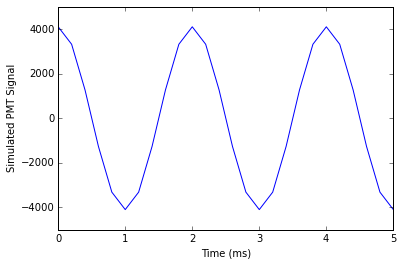

In [11]:
n_total_samples = 1001
time_interrupts = np.linspace(0, n_total_samples*t_inter*1e-3, num=n_total_samples)
test_signal = np.zeros(n_total_samples)
for i in range (n_total_samples):
    test_signal = 4095*(np.cos(2*np.pi*500*time_interrupts))

fig, ax = plt.subplots()
ax.plot(time_interrupts, test_signal)
#ax.set_ylim(-2,2)
ax.set_xlim(0,5)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Simulated PMT Signal');

In [5]:
test_signal

array([ 4095.        ,  3312.92459197,  1265.42459197, -1265.42459196,
       -3312.92459197, -4095.        , -3312.92459197, -1265.42459197,
        1265.42459196,  3312.92459197,  4095.        ,  3312.92459197,
        1265.42459197, -1265.42459197, -3312.92459196, -4095.        ,
       -3312.92459197, -1265.42459196,  1265.42459196,  3312.92459196,
        4095.        ,  3312.92459197,  1265.42459196, -1265.42459196,
       -3312.92459196, -4095.        , -3312.92459196, -1265.42459197,
        1265.42459196,  3312.92459197,  4095.        ,  3312.92459196,
        1265.42459197, -1265.42459197, -3312.92459197, -4095.        ,
       -3312.92459197, -1265.42459196,  1265.42459196,  3312.92459196,
        4095.        ,  3312.92459196,  1265.42459197, -1265.42459196,
       -3312.92459197, -4095.        , -3312.92459197, -1265.42459195,
        1265.42459195,  3312.92459196,  4095.        ,  3312.92459197,
        1265.42459196, -1265.42459197, -3312.92459196, -4095.        ,
      

In [12]:
def fir_basic(new_value, h, buf):
    '''Calculate FIR filtered value given filter coefficients, h, and delay line, buf
    
       inputs:
           new_value - latest sample
           h - array of filter coefficients
           buf - array containing previous sample values. Should be equal in length to h
       returns:
           new filtered value'''
    num_coef = len(h)
    buf[0] = new_value
    accum = 0
    for i in range(1, num_coef, 1):
        accum += h[i] * buf[i]
    # shift values to right in z buffer
    for i in range(num_coef-2, -1, -1):
        buf[i+1] = buf[i]
    #print(z, '\n', h)
    return accum

def zero_buf(buf):
    buf = 0.0

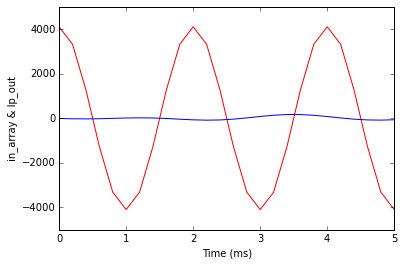

In [13]:
in_array = np.copy(test_signal)
#in_array += 3000
n_pts = len(in_array)
bp_out = np.zeros(n_pts)
zero_buf(buf) 
for i in range(n_pts):
    bp_out[i] = fir_basic(in_array[i], bp_coef,buf)

fig, ax = plt.subplots()
ax.set_xlim(0,5)
ax.plot(time_interrupts, in_array, 'r')
ax.plot(time_interrupts, bp_out)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('in_array & lp_out');

In [14]:
bp_out


array([ -11.17854063,  -26.57797933,  -31.12322956,  -23.44729981,
         -7.55123144,    8.58651789,   16.11075494,    8.97146868,
        -13.22329293,  -44.34211155,  -73.31748911,  -87.7561984 ,
        -78.36571901,  -42.62957841,   13.63158923,   77.4736681 ,
        132.52038824,  163.95623434,  163.16407854,  130.44649745,
         74.91019811,   11.55769845,  -43.42173419,  -77.57356321,
        -85.6823076 ,  -70.75401911,  -42.26822075,  -12.43113714,
          8.17931288,   14.03686414,    6.02304788,   -9.62512224,
        -24.23945561,  -30.33107377,  -24.50408854,   -8.61507063,
         11.17854063,   26.94711893,   32.42281369,   25.51409563,
          8.85986024,  -11.17854063,  -26.94711893,  -32.42281369,
        -25.51409563,   -8.85986024,   11.17854063,   26.94711893,
         32.42281369,   25.51409563,    8.85986024,  -11.17854063,
        -26.94711893,  -32.42281369,  -25.51409563,   -8.85986024,
         11.17854063,   26.94711893,   32.42281369,   25.51409